## Problem C3: Linear Classification & Decision Trees

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### A. Load Data

In [2]:
data=pd.read_csv('data_banknote_authentication.csv')

Y= data[['label']].to_numpy().reshape(-1)
X= data.to_numpy()[:,:-1]



train_data=data.loc[:len(data)*0.8]
test_data=data.loc[len(data)*0.8:]


Y_train= train_data[['label']].to_numpy().reshape(-1)
X_train= train_data.to_numpy()[:,:-1]

Y_test= test_data[['label']].to_numpy().reshape(-1)
X_test= test_data.to_numpy()[:,:-1]




### B. Perceptron Algorithm

In [3]:
def calc_loss( X_te , Y_te , w):
    tmp=np.matmul(w,X_te.T)>0
    predict_vector=np.array(list(map(lambda x: 1 if x else -1, tmp[0])))
    loss=np.sum(predict_vector*Y_te <0)/len(predict_vector)
    return loss
    

def perceptron(X_tr , Y_tr , X_te , Y_te , max_iter =50000) :   
    # initialize the algorithm:
    number_feature = X_tr.shape[1]
    w=np.zeros((1,number_feature))
    loss_history_test,loss_history_train=[],[]
    
    for iteration in range(max_iter):
        # find predicted vecor
        tmp=np.matmul(w,X_tr.T)>0
        predict_vector=np.array(list(map(lambda x: 1 if x else -1, tmp[0])))
        
        # find vioalted points
        violation_X=X_tr[predict_vector*Y_tr <0]
        violation_Y=Y_tr[predict_vector*Y_tr <0]
        
        # update W if neeeded
        if len(violation_Y)==0:
            break
        w = w+ violation_Y[0]*violation_X[0]

        # calc loss for train and test every 500 iteration
        if (iteration+1) % 500 == 0  or iteration==0:
            loss_history_test.append(calc_loss( X_te , Y_te , w))  
            loss_history_train.append(calc_loss( X_tr , Y_tr , w))  
    return w , loss_history_train, loss_history_test , iteration


****
##### The reason of Adding one to each data point is to make the equation $\hat{y}=<w^T,x>+b $ to  $\hat{y}=<w'^T,x'>$ which w' and x' are Homogenous by adding one to each data point

****


 weights are :  [475.0, 201.506, -109.403, 39.199, 1339.065] 

 Final loss for test is :  0.01824817518248175 

 Final loss for train is :  0.0 



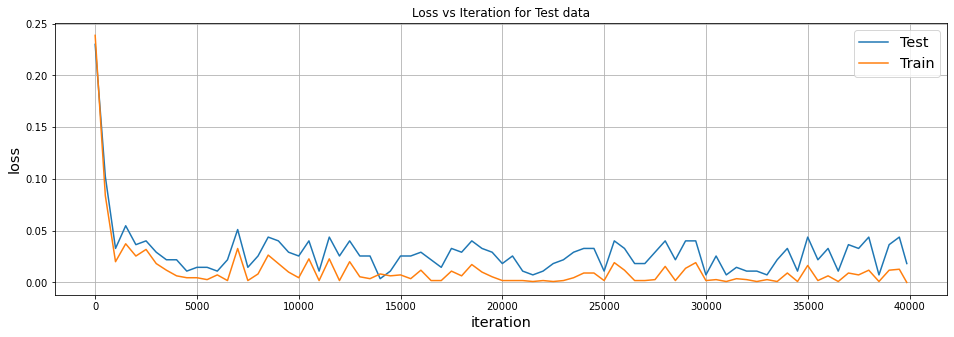

In [4]:
# append one to training and test set to make them Homogenous
X_train_Homogenous=(np.hstack([np.ones((len(X_train),1)),X_train]))
X_test_Homogenous=(np.hstack([np.ones((len(X_test),1)),X_test]))

#### start the algorithm
[w1 , loss_history_train , loss_history_test ,iteration] = perceptron(X_train_Homogenous , Y_train , X_test_Homogenous , Y_test )
final_loss_test=calc_loss( X_test_Homogenous , Y_test , w1)
final_loss_train=calc_loss( X_train_Homogenous , Y_train , w1)
loss_history_test.append(final_loss_test)
loss_history_train.append(final_loss_train)

### print results
w_=list(map(lambda x: round(x,3), w1[0].tolist()))
print("\n weights are : ", w_,'\n')
print(' Final loss for test is : ' , final_loss_test,'\n')
print(' Final loss for train is : ' , final_loss_train,'\n')

## plot results
plt.figure(figsize=(16,5))
plt.title("Loss vs Iteration for Test data")
tmp=list(np.arange(0,500*(len(loss_history_test)-1),500))
tmp.append(iteration)
plt.plot(tmp,loss_history_test); plt.grid(True)
plt.plot(tmp,loss_history_train); plt.legend(['Test','Train'],fontsize='x-large')
plt.xlabel('iteration',fontsize='x-large'); plt.ylabel('loss',fontsize='x-large'); plt.show()


### C. Generalize to non-linear classification


 weights are :  [124.0, 70.01, -40.227, 10.692, 318.634, 64.323] 

 Final loss for test is :  0.0036496350364963502 

 Final loss for train is :  0.0 



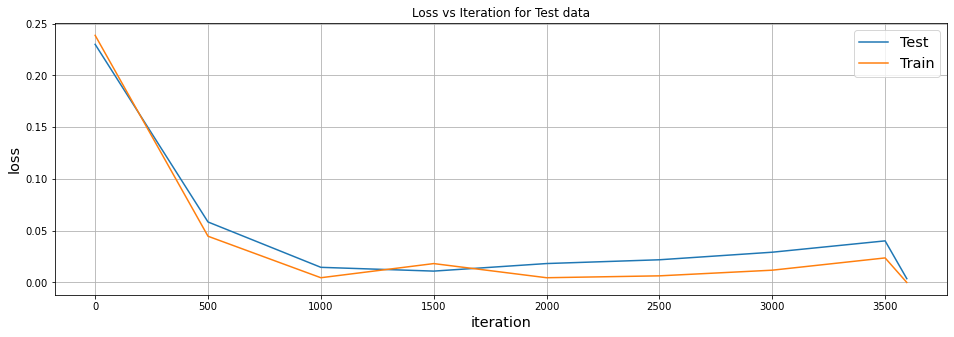

In [5]:
## map X to phi
tmp=(np.power(X_train_Homogenous[:,-1],3))
X_train2=np.transpose((np.vstack([np.transpose(X_train_Homogenous),tmp])))

tmp=(np.power(X_test_Homogenous[:,-1],3))
X_test2=np.transpose((np.vstack([np.transpose(X_test_Homogenous),tmp])))

#### start the algorithm
[w2 , loss_history_train , loss_history_test ,iteration] = perceptron(X_train2 , Y_train , X_test2 , Y_test )
final_loss_test=calc_loss( X_test2 , Y_test , w2)
final_loss_train=calc_loss( X_train2 , Y_train , w2)
loss_history_test.append(final_loss_test)
loss_history_train.append(final_loss_train)

### print results
w_=list(map(lambda x: round(x,3), w2[0].tolist()))
print("\n weights are : ", w_,'\n')
print(' Final loss for test is : ' , final_loss_test,'\n')
print(' Final loss for train is : ' , final_loss_train,'\n')

## plot results 
plt.figure(figsize=(16,5))
plt.title("Loss vs Iteration for Test data")
tmp=list(np.arange(0,500*(len(loss_history_test)-1),500))
tmp.append(iteration)
plt.plot(tmp,loss_history_test); plt.grid(True)
plt.plot(tmp,loss_history_train); plt.legend(['Test','Train'],fontsize='x-large')
plt.xlabel('iteration',fontsize='x-large'); plt.ylabel('loss',fontsize='x-large'); plt.show()


### D. SVM algorithm

In [6]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, Y_train)
true_loss = np.sum((clf.predict(X_test)*Y_test) <0)/len(X_test)
emp_loss = np.sum((clf.predict(X_train)*Y_train) <0)/len(X_train)

### print results
print('\nemp_loss is : ',round(emp_loss,5))
print('true_loss is : ',true_loss,'\n')
w3=list(np.hstack([clf.intercept_[0],clf.coef_[0]]))
w_=list(map(lambda x: round(x,4), w3))
print("weights are : ", w_,'\n')


emp_loss is :  0.00364
true_loss is :  0.01824817518248175 

weights are :  [1.9461, 1.0882, -0.5231, 0.2128, 5.9618] 



### E. Conclusion

<big>first of all we normalize weights from three methods , in othe word we divide vector W by b or W[0] so we have :</big>

$
method \;I~~~~~~ :
\quad W=[ 1 \;,\; 0.42422\;\; ,\; \;-0.23032 \;\;,\;\; 0.08252 \;\;,\;\; 2.81906]~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ True\;loss\;:\; 0.01824817518248175 $

$
method \;II~~~~ :
\quad W=[ 1 \;,\; 0.56456 \;\;,\; \;-0.32441 \;\;,\;\; 0.08624 \;\;,\;\; 2.56963 \;\;,\;\;0.51874] ~~~~~~~~~~ True\;loss\;:\; 0.0036496350364963502$ 

$
method \;III ~~:
\quad W=[ 1 \;,\; 0.55917 \;\;,\;\; -0.26880 \;\;,\;\; 0.10933 \;\;,\;\; 3.06345]~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~  True\;loss\;:\; 0.01824817518248175 
$

<big>As we see, the weights in method one and three are almost equal, so we get some errors in method one and three, but in method three, our W vector has one more element, and input data have one more feature, so we have more freedom to do the classification, and so we get less error, but also it is good to mention if we increase the freedom of model too high we can cause overfitting and the True loss can get very high.</big>



***
****

## Problem C4: Decision Trees

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### A. Load Data

In [8]:
#### load data and split to train , validation , test
data=pd.read_csv('mushrooms.csv')

train_data=data.loc[:len(data)*0.7]
validation_data=data.loc[len(data)*0.7:len(data)*0.9]
test_data=data.loc[len(data)*0.9:]

Y_train= train_data[['class']].to_numpy().reshape(-1)
X_train= train_data.to_numpy()[:,1:]

Y_val= validation_data[['class']].to_numpy().reshape(-1)
X_val= validation_data.to_numpy()[:,1:]

Y_test= test_data[['class']].to_numpy().reshape(-1)
X_test= test_data.to_numpy()[:,1:]


### B. Train Desicion Tree

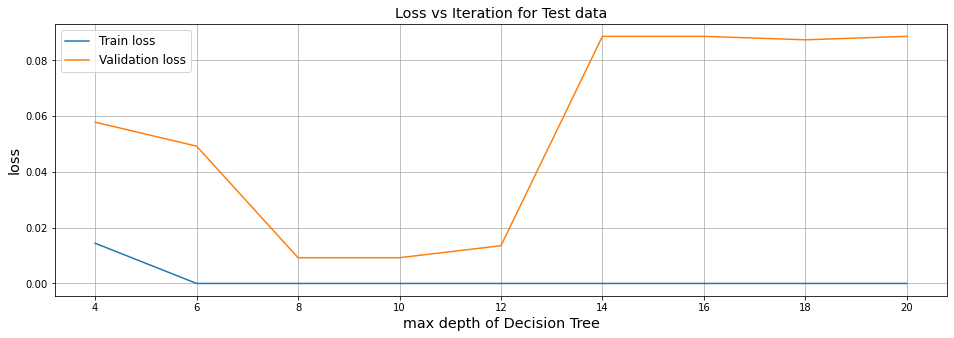

In [29]:


from sklearn import tree

depth_tree =[4 , 6 , 8 , 10 , 12 , 14 , 16 , 18 , 20]
loss_train,loss_val=[],[]

for d in depth_tree:

    clf = tree.DecisionTreeClassifier(max_depth=d)
    clf = clf.fit(X_train, Y_train)

    loss_train.append( np.sum(clf.predict(X_train) != Y_train)/len(Y_train))
    loss_val.append( np.sum(clf.predict(X_val) != Y_val)/len(Y_val))


## plot results 
plt.figure(figsize=(16,5))
plt.title("Loss vs Iteration for Test data",fontsize='x-large')
plt.plot(depth_tree,loss_train); plt.grid(True)
plt.plot(depth_tree,loss_val); plt.legend(['Train loss','Validation loss'],fontsize='large')
plt.xlabel('max depth of Decision Tree',fontsize='x-large'); plt.ylabel('loss',fontsize='x-large'); plt.show()


***
<b>conclusion:</b>
based on above graph we may choose `max depth of DT=  10` as our input feature.
***

#### Calc loss for Test set with best max depth

In [31]:


clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train, Y_train)
loss = np.sum(clf.predict(X_test) != Y_test)/len(Y_test)
print( "\n loss for the best maximum depth : " ,loss,'\n')


 loss for the best maximum depth :  0.02586206896551724 





<div style="direction:rtl">
    <b>Conclusion : </b>
  مهمترین نکته ای که باید به آن توجه شود اینست که بدلیل تعداد کم داده ها با هر بار آموزش دادن درخت مقدار loss متفاوتی برای validation بدست میآید (اندکی تفاوت دارد ) برای همین ممکن است با دوباره اجرای کد نمودار و جواب بهینه دیگری حاصل شود ، ولی در نمودار فوق مشاهده میکنیم که مقدار خطا برای validation با افزایش عمق ابتدا کم شده و سپس از عمق برابر با 10 افزایش میابد که به معنای overfit شدن است ، پس مقدار 10 را به عنوان عمق بهینه انتخاب میکنیم ، همچنین همانطور که انتظار میرود مقدار loss روی train با افزایش عمق کاهشی است .  
</div>
 